# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
url = "healthcare_dataset.csv"
df = pd.read_csv(url)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# DATA CLEANING & TRANSFORMATION

In [3]:
#checking null for each column
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [4]:
# acknowledge abt dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
# check dupe
df.duplicated().sum()

0

In [6]:
# transform object into datetime type
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [7]:
# i wanna see datediff between both date, so i create a new column that contains datediff from both date
df['Number of Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [8]:
# describe data (not include obj)
df.describe()

,Age,Billing Amount,Room Number,Number of Days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000,15.561800
std,19.588974,14067.292709,115.806027,8.612038
min,18.000000,1000.180837,101.000000,1.000000
25%,35.000000,13506.523967,199.000000,8.000000
50%,52.000000,25258.112566,299.000000,16.000000
75%,68.000000,37733.913727,400.000000,23.000000
max,85.000000,49995.902283,500.000000,30.000000


In [9]:
# describe data (include obj)
df.describe(include=object).T

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood Type,10000,8,AB-,1275
Medical Condition,10000,6,Asthma,1708
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance Provider,10000,5,Cigna,2040
Admission Type,10000,3,Urgent,3391
Medication,10000,5,Penicillin,2079
Test Results,10000,3,Abnormal,3456


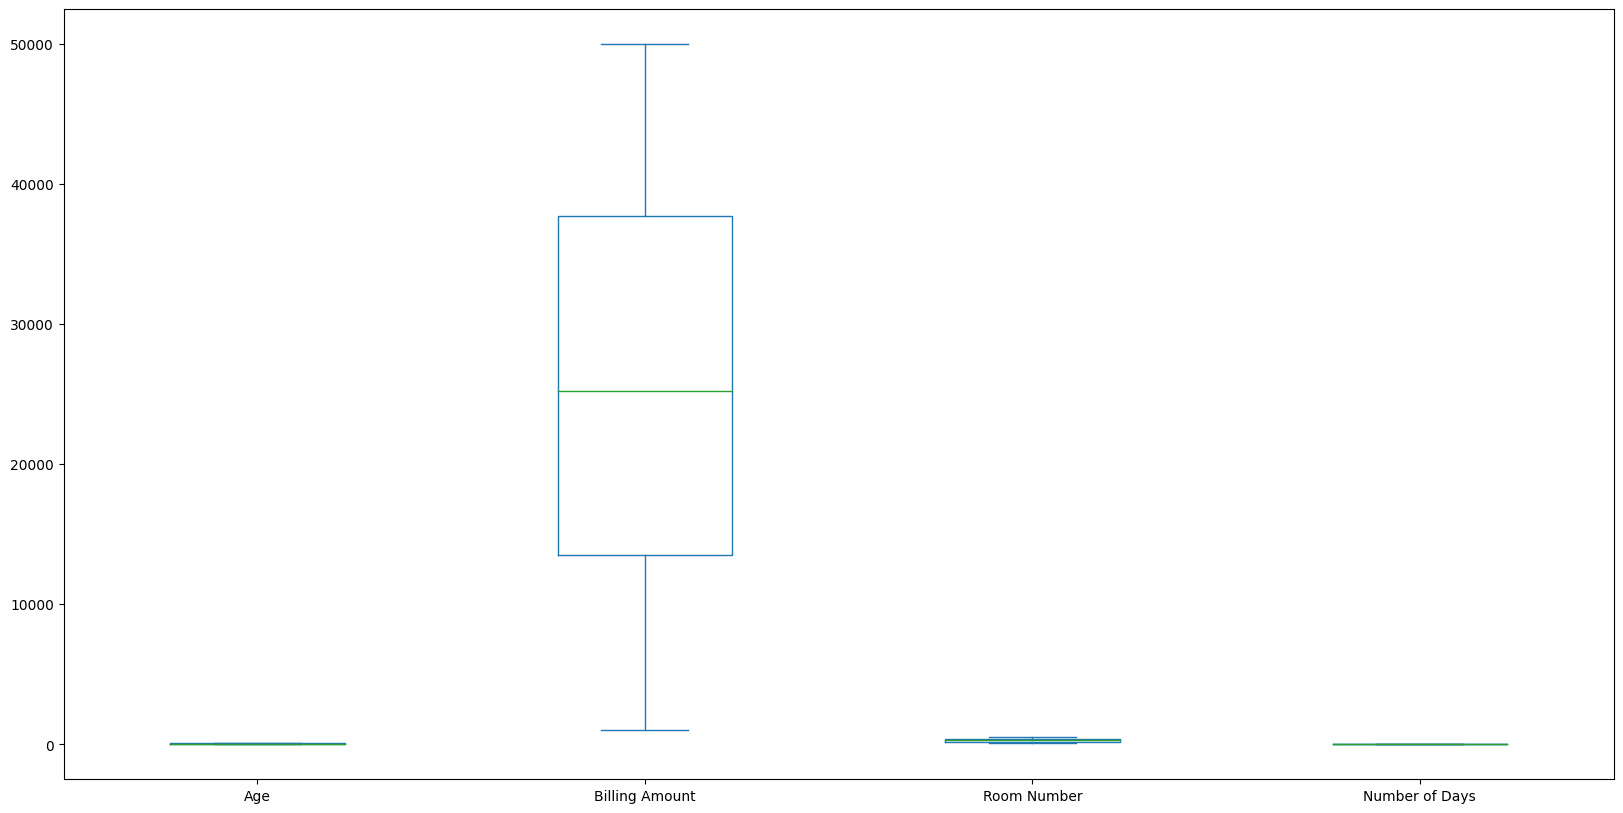

In [10]:
# check outliers (seems normal)
import pandas as pd
import matplotlib.pyplot as plt

df.plot(kind='box', figsize=(20, 10))
plt.show()

In [11]:
#dropping unwanted and unuseful column/feature
df = df.drop(['Name','Doctor','Hospital','Room Number'], axis = 1)
df = df.drop(['Date of Admission', 'Discharge Date'], axis=1)

In [12]:
df.head(5)

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Number of Days
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
#Handle categorical feature into numeric using label encoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Medication'] = le.fit_transform(df['Medication'])
df['Test Results'] = le.fit_transform(df['Test Results'])
df['Insurance Provider'] = le.fit_transform(df['Insurance Provider'])
#Handle wide range billing ammount into new range that in small range for each data/row, no need label encoding for billing amount bcoz already numeric
Sc = StandardScaler()
df['Billing Amount'] = Sc.fit_transform(df[['Billing Amount']])

In [14]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Number of Days
0,81,0,7,3,3,0.851249,0,0,1,14
1,35,1,6,1,4,1.548866,1,2,2,14
2,61,1,5,5,3,0.807452,1,2,2,30
3,49,1,5,1,3,-0.157358,2,4,0,1
4,51,1,7,0,4,-0.528235,2,3,2,24


# DATA VISUALIZATION (EDA)

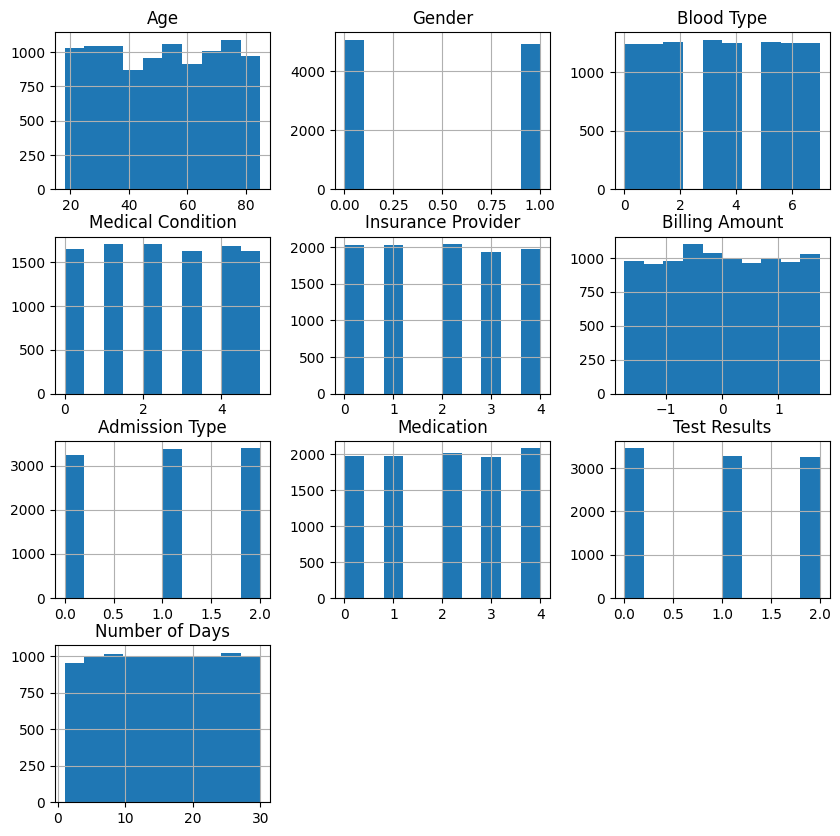

In [15]:
#Univariate EDA
df.hist(figsize=(10,10))
plt.show()

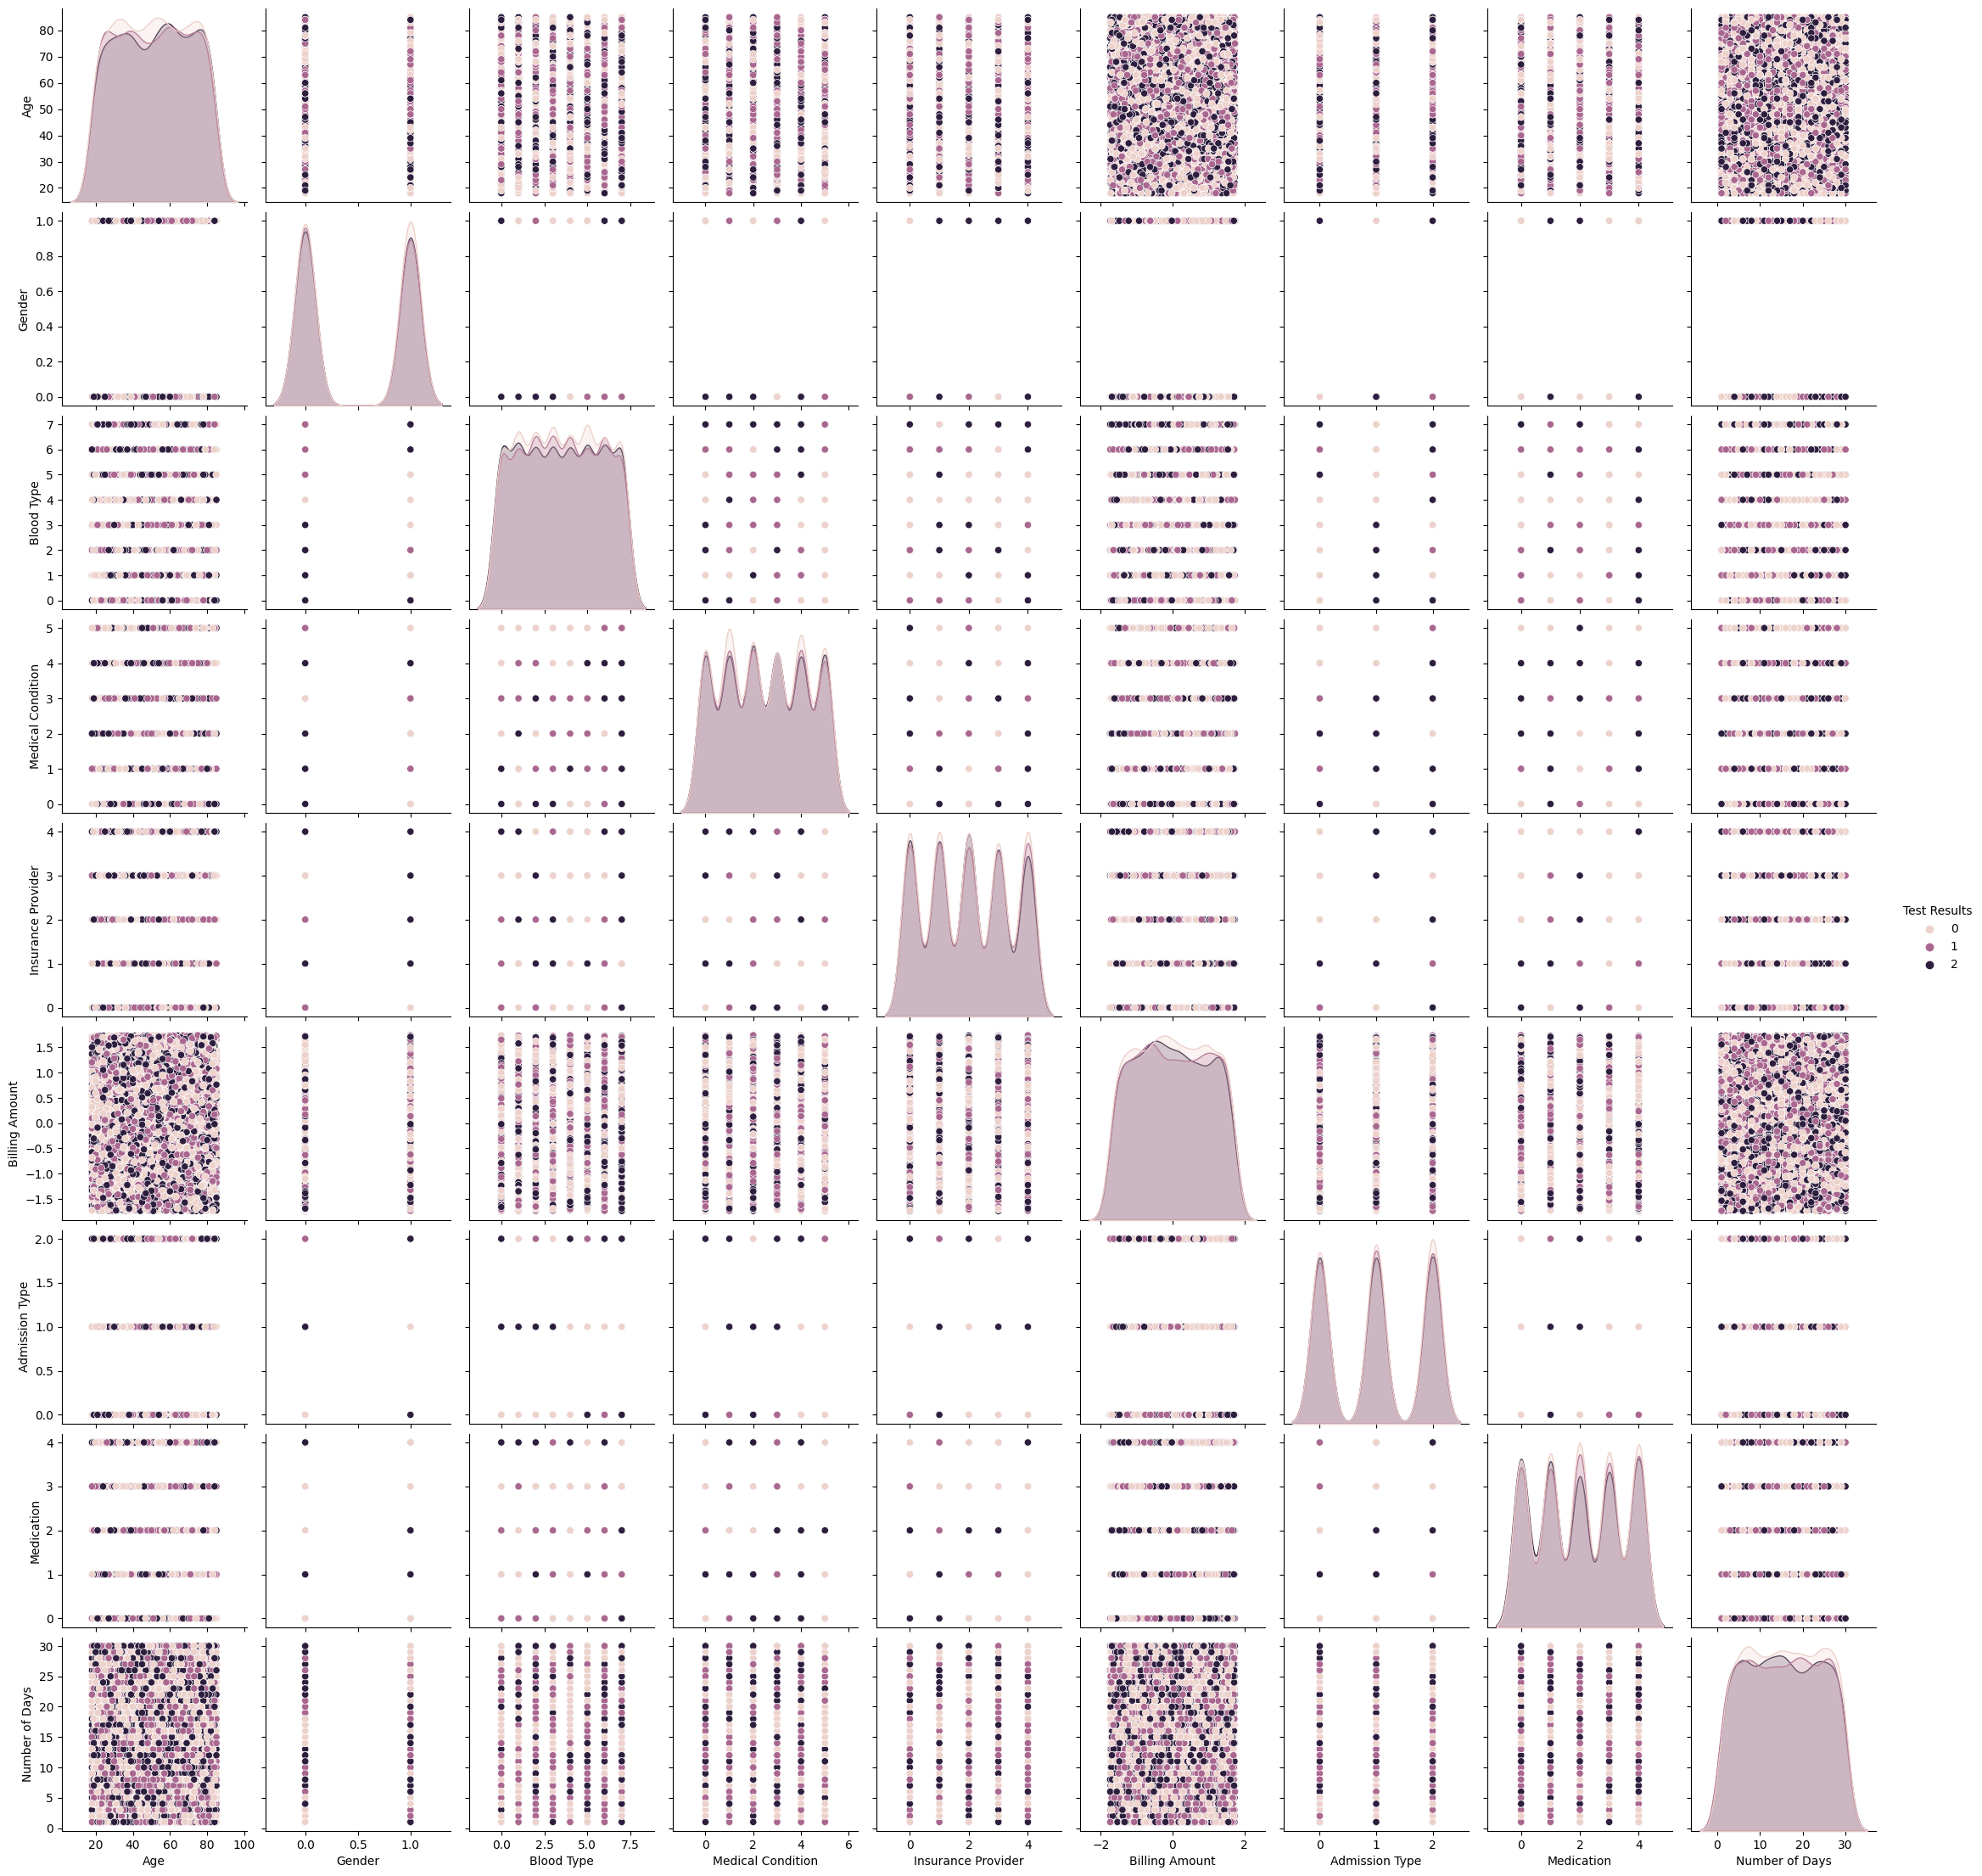

In [16]:
#Multivariate EDA
sns.pairplot(df, hue='Test Results')

<Axes: >

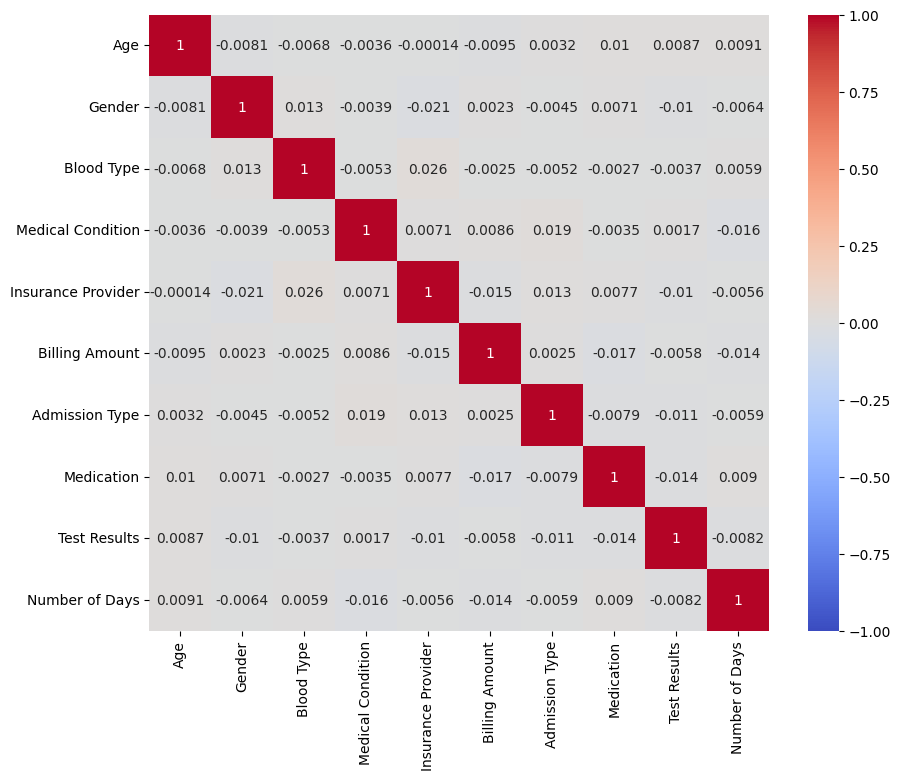

In [17]:
#Multivariate EDA
corr_matrix=df.corr()
plt.figure(1, figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, vmin=-1, vmax=1)

# LOGISTIC REGRESSION

In [18]:
#i wanna set Test Results as a Dependent variable
X = df.drop(['Test Results'], axis = 1)
Y = df['Test Results']

In [19]:
scaler = StandardScaler()
scaler.fit(X)
scaler_transformed = scaler.transform(X)
scaler_transformed

array([[ 1.50846482, -0.98511083,  1.53060631, ..., -1.24635266,
        -1.42459457, -0.18135987],
       [-0.83991244,  1.01511421,  1.09315274, ..., -0.01829801,
        -0.01466329, -0.18135987],
       [ 0.48743123,  1.01511421,  0.65569916, ..., -0.01829801,
        -0.01466329,  1.67659758],
       ...,
       [ 0.13006947,  1.01511421,  0.65569916, ..., -1.24635266,
        -0.71962893, -0.18135987],
       [ 1.66161985,  1.01511421, -1.53156871, ...,  1.20975664,
         1.39526799,  0.51537417],
       [-1.60568763,  1.01511421,  0.65569916, ..., -0.01829801,
         1.39526799,  0.97986354]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\KENT LEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm


array([[438, 198,  70],
       [418, 157,  61],
       [401, 187,  70]], dtype=int64)

<Axes: >

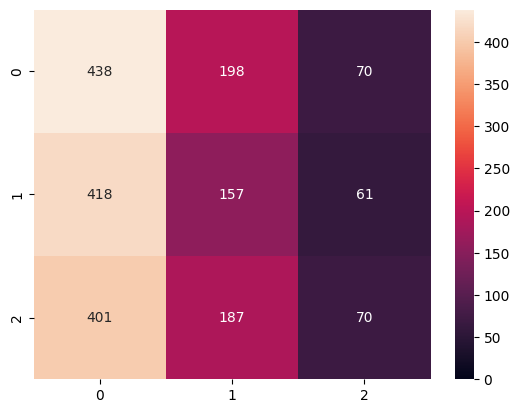

In [23]:
# why there's 3 ? because i predict test result that contains 3 classes (0, 1, 2)
sns.heatmap(confusion_matrix(y_test,y_pred), vmin=0, annot=True, fmt="d")

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression: {accuracy}')

Accuracy Logistic Regression: 0.3325


# KNN CLASSIFIER

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric="euclidean", p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy KNN Classifier: {accuracy}')

Accuracy KNN Classifier: 0.3395


# XGBOOST

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy XGBoost: {accuracy}')

Accuracy XGBoost: 0.3525


# LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression
linregress = LinearRegression()
linregress.fit(X_train,y_train)

LinearRegression()

In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Test Results   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8161
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.601
Time:                        20:19:35   Log-Likelihood:                -12198.
No. Observations:               10000   AIC:                         2.442e+04
Df Residuals:                    9990   BIC:                         2.449e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0247      0

In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
RMSE = mse(y_test, y_pred)
print(np.sqrt(RMSE))

1.1355615351005863


# K-MEANS

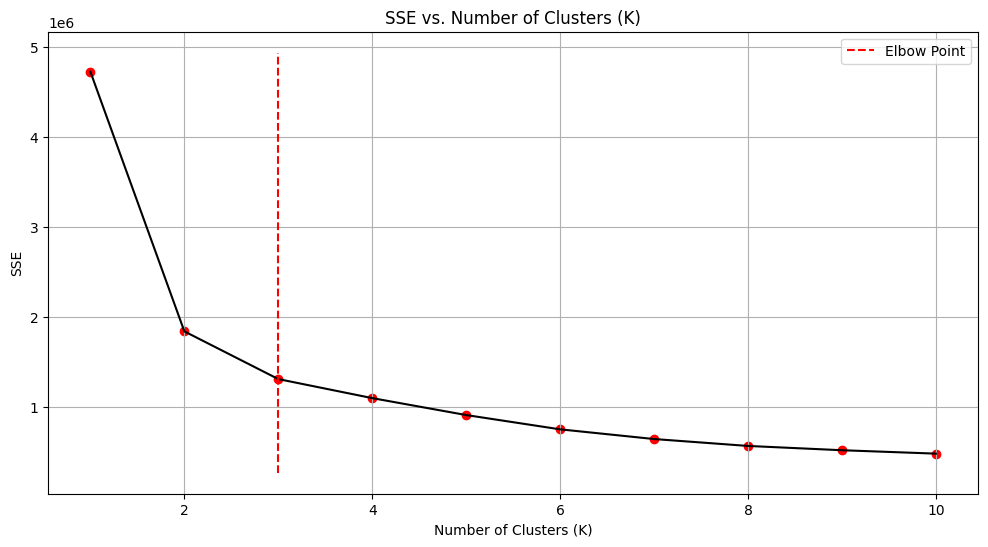

In [32]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

#Elbow method
kmeans_kwargs = {"init" : "k-means++","n_init" :10,"max_iter":300, "random_state":42}
sse=[]
# check the inertia for each K
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(df) 
    sse.append(kmeans.inertia_)
    
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), sse, color='black')
plt.scatter(range(1,11),sse,color='red')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label='Elbow Point')
plt.legend()
plt.show()


In [33]:
#using kneelocator to find the elbow/knee
kneed = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneed.elbow)

The best k for you model is 3


In [34]:
#Group into several cluster using kmeans
kmeans1 = KMeans(n_clusters=4,init="random").fit(df)
sse.append(kmeans.inertia_)
df_kmeans = kmeans1.predict(df)
df["Cluster"]= df_kmeans
df.head()

c:\Users\KENT LEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Number of Days,Cluster
0,81,0,7,3,3,0.851249,0,0,1,14,0
1,35,1,6,1,4,1.548866,1,2,2,14,3
2,61,1,5,5,3,0.807452,1,2,2,30,1
3,49,1,5,1,3,-0.157358,2,4,0,1,2
4,51,1,7,0,4,-0.528235,2,3,2,24,1


# AGGLOMERATIVE

In [35]:
#mode = categorical
df.groupby("Cluster")["Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type", "Medication", "Test Results"].agg(pd.Series.mode)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_10228\1307058765.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Cluster")["Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type", "Medication", "Test Results"].agg(pd.Series.mode)


,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
Cluster,,,,,,,
0,0,0,2,0,2,4,0
1,0,5,1,"[1, 2]",1,4,0
2,1,7,5,2,2,1,1
3,0,1,4,2,2,2,0


In [36]:
#mean = continous
df.groupby("Cluster")["Age", "Billing Amount", "Number of Days"].agg(pd.Series.mean)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_10228\3156654057.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Cluster")["Age", "Billing Amount", "Number of Days"].agg(pd.Series.mean)


,Age,Billing Amount,Number of Days
Cluster,,,
0,75.024495,-0.002729,15.702747
1,52.177028,-0.030903,23.456270
2,52.062963,0.025768,7.535979
3,28.342839,0.005702,15.486368


In [37]:
df.groupby("Cluster")["Cluster"].agg(pd.Series.count)

Cluster
0    3021
1    1898
2    1890
3    3191
Name: Cluster, dtype: int64

# HIERARCHICAL (DENDOGRAM)

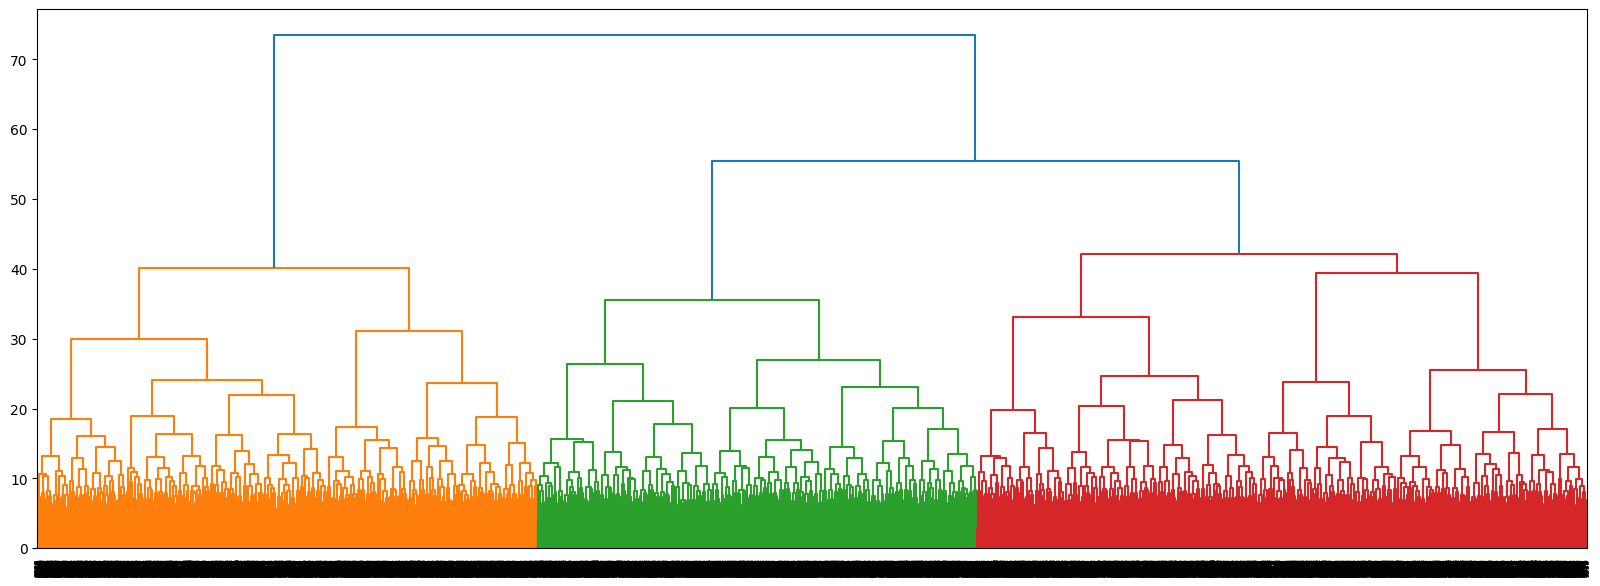

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df, method='complete')
dendrogram(linkage_data)
plt.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
label = model.fit_predict(df)
print(label)

c:\Users\KENT LEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 1 3 ... 1 0 2]


In [41]:
df["Agglo"] = label
df.groupby("Agglo")["Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type", "Medication", "Test Results"].agg(pd.Series.mode)


C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_10228\1802262044.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Agglo")["Gender", "Blood Type", "Medical Condition", "Insurance Provider", "Admission Type", "Medication", "Test Results"].agg(pd.Series.mode)


,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
Agglo,,,,,,,
0,0,3,5,0,2,4,0
1,1,7,0,2,1,4,0
2,0,1,4,1,2,2,0
3,0,2,2,1,1,4,0


In [42]:
df.groupby("Agglo")["Age", "Billing Amount", "Number of Days"].agg(pd.Series.mean)

C:\Users\KENT LEE\AppData\Local\Temp\ipykernel_10228\3847586951.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Agglo")["Age", "Billing Amount", "Number of Days"].agg(pd.Series.mean)


,Age,Billing Amount,Number of Days
Agglo,,,
0,73.578362,-0.024513,12.739130
1,42.938485,0.023710,14.819580
2,25.763091,0.014980,14.293919
3,60.397199,-0.012984,22.243122


In [43]:
df.groupby("Agglo")["Agglo"].agg(pd.Series.count)

Agglo
0    2967
1    2666
2    2368
3    1999
Name: Agglo, dtype: int64